In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pl


In [2]:
#importing datasets
df = pd.read_csv('/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv')

In [3]:
#checking data distrubution across each columns
df.count()

person_age                    32581
person_income                 32581
person_home_ownership         32581
person_emp_length             31686
loan_intent                   32581
loan_grade                    32581
loan_amnt                     32581
loan_int_rate                 29465
loan_status                   32581
loan_percent_income           32581
cb_person_default_on_file     32581
cb_person_cred_hist_length    32581
dtype: int64

In [4]:
#handling null values is a primary step, handling null values helps model predict more accurately
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
# Seems like there are only 2 columns needed null value handling, they were of type numeric so imputing 0 will not harm our analysis
df['loan_int_rate'] = df['loan_int_rate'].fillna(0)
df['person_emp_length'] = df['person_emp_length'].fillna(0)

In [6]:
#Null value handled
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [7]:
#this helps in checking columns type and dimensions, a vital step to do with any dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
#converting person income column to float, just for the sake of our analysis
df['person_income'] = df['person_income'].astype(float)

In [9]:
#describe gives us a birds eye view of the data, we can check the value concentration and also we can observe the data spread which is good to locate outliers.
df.describe()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.658114,9589.371106,9.958552,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.159669,6322.086646,4.470390,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,0.000000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.620000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [10]:
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000.0,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600.0,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600.0,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500.0,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400.0,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900.0,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100.0,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956.0,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000.0,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000.0,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


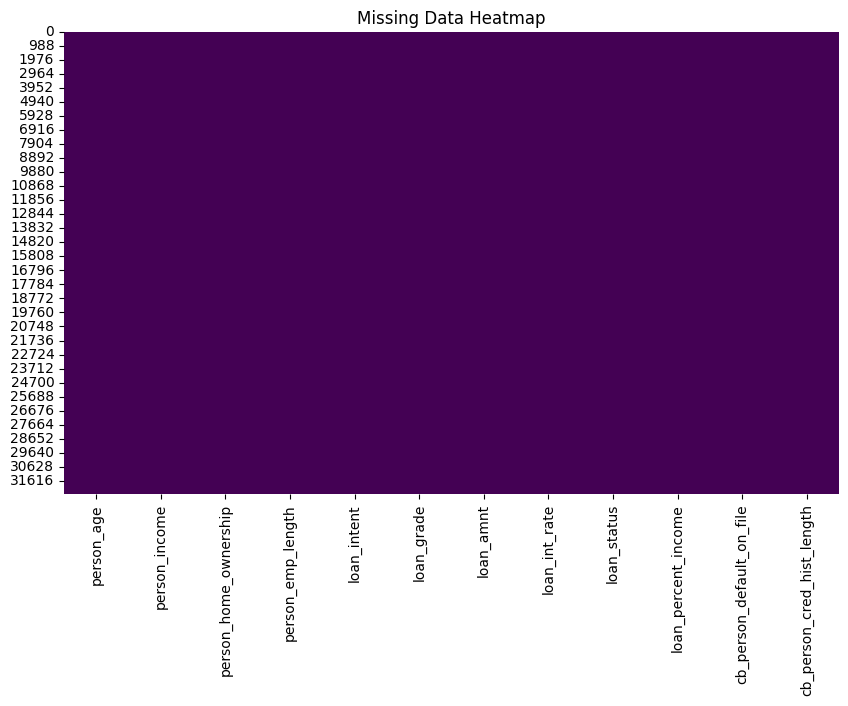

In [11]:
# Check for missing data using heatmap. Looks like we are good to go with missing data handling
missing_data = df.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


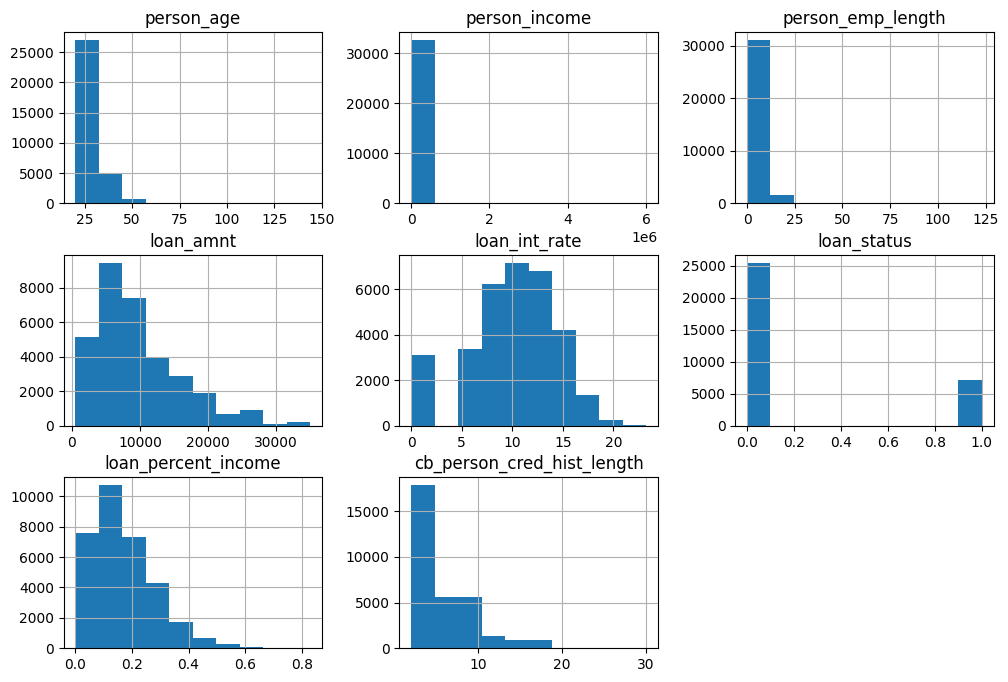

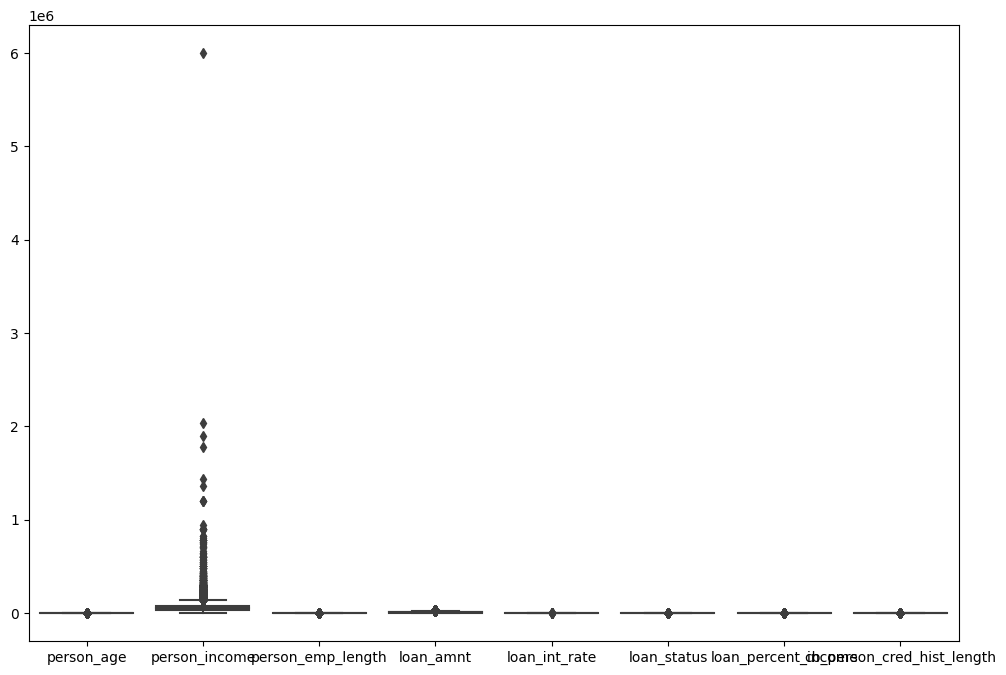

In [12]:
# Histograms for numerical columns. This is a very cool way to view all the numeric ways plotted, this can provide a hollistic view of all the variables
# we can see in the below chart, there is an outlier with person_income, I have left it unhandled as income can have outliers and by volume it is not that much.

df.hist(figsize=(12, 8))
plt.show()

# Box plots for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='v') 
plt.show()


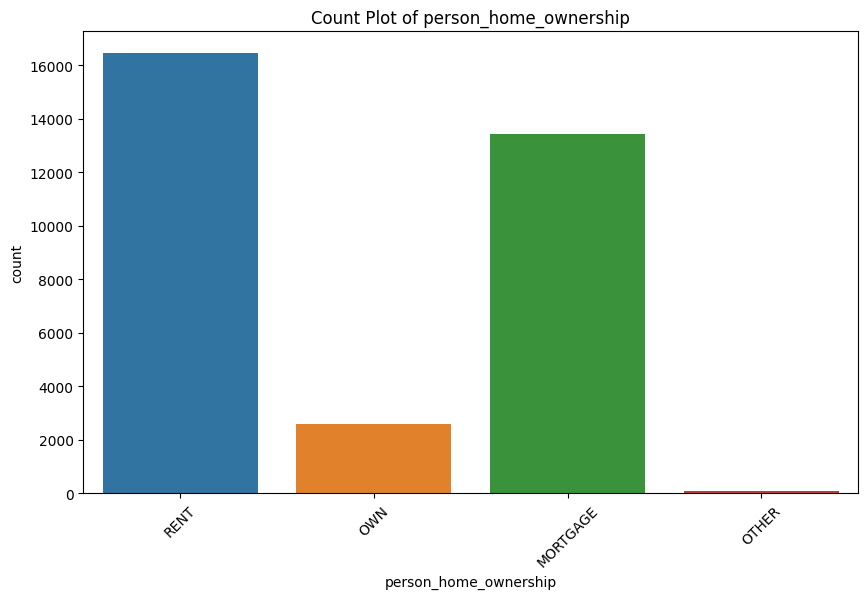

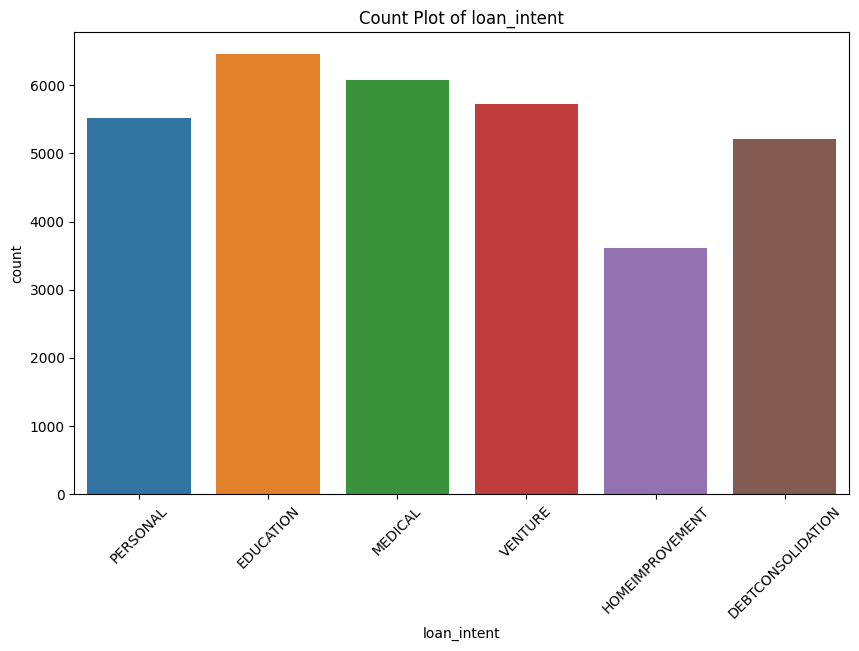

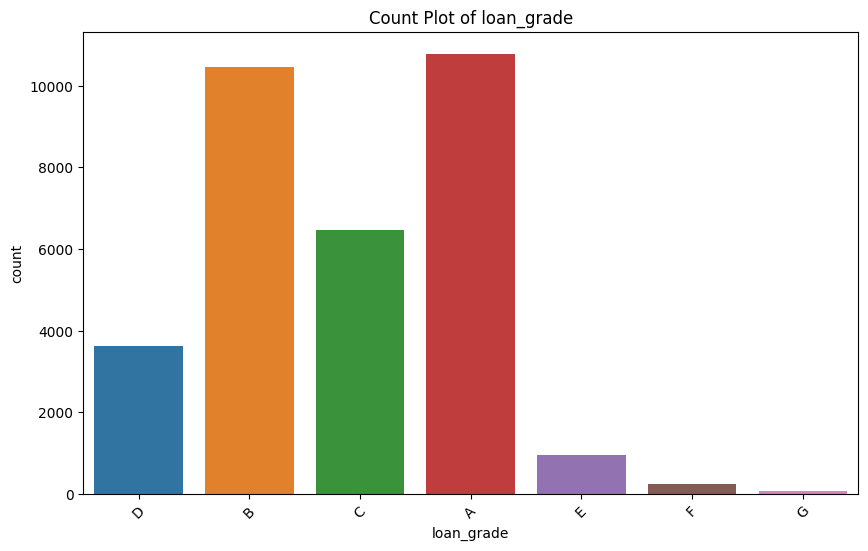

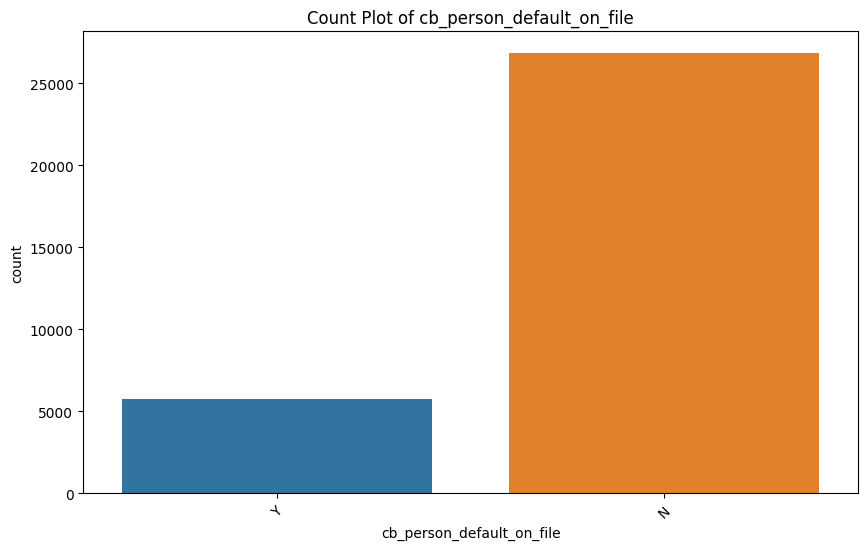

In [13]:
# Count plots for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()


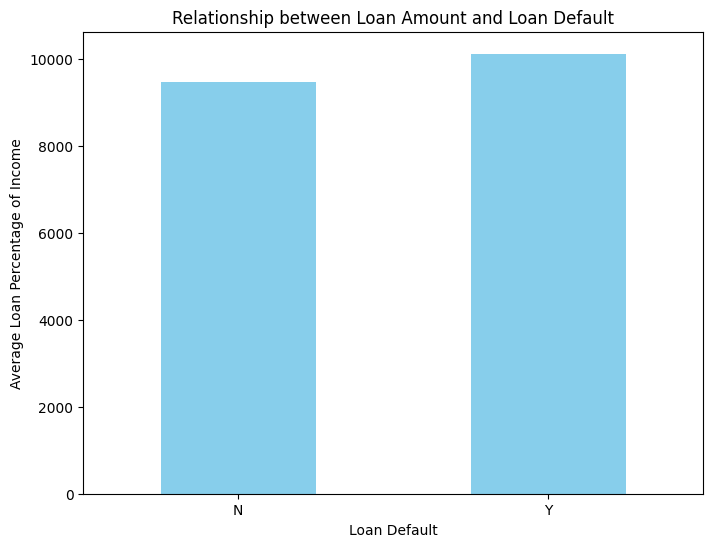

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'loan_percentage_income' and 'loan_default'

# Group the data by 'loan_default' and calculate the mean loan_percentage_income for each category
grouped = df.groupby('cb_person_default_on_file')['loan_amnt'].mean()

# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
grouped.plot(kind='bar', color='skyblue')
plt.xlabel('Loan Default')
plt.ylabel('Average Loan Percentage of Income')
plt.title('Relationship between Loan Amount and Loan Default')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()


We can observe in above plot, that there loan defaults for the amount ~>85k

<Axes: ylabel='count'>

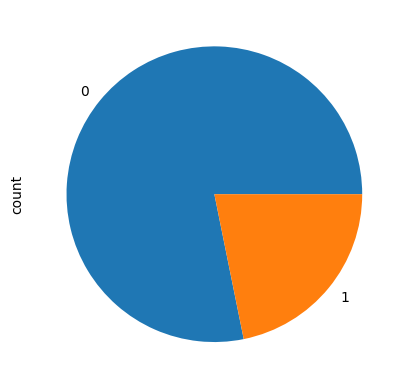

In [15]:
# here loan status is taken as follows - 0 as Non Default & 1 as Default
df["loan_status"].value_counts().plot.pie()

According to the original data, there are more non-defaults than defaults

Encoding is a very important step, it basically converts categorical to numeric, machine requires a data to be in numeric format to process it.

In [16]:
# First, encode categorical features, use one hot encoding here 
df_encoded = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent','loan_grade', 'cb_person_default_on_file'])

In [17]:
df_encoded.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000.0,123.0,35000,16.02,1,0.59,3,False,False,...,False,False,False,False,True,False,False,False,False,True
1,21,9600.0,5.0,1000,11.14,0,0.10,2,False,False,...,False,False,True,False,False,False,False,False,True,False
2,25,9600.0,1.0,5500,12.87,1,0.57,3,True,False,...,False,False,False,True,False,False,False,False,True,False
3,23,65500.0,4.0,35000,15.23,1,0.53,2,False,False,...,False,False,False,True,False,False,False,False,True,False
4,24,54400.0,8.0,35000,14.27,1,0.55,4,False,False,...,False,False,False,True,False,False,False,False,False,True


In [18]:
df_encoded = df_encoded.astype(int)

In [19]:
# df_encoded

Correlation is one of the highly recommended step in any analysis. In the below step I have checked the correlation between independant variables with dependant variable which is also our target variable i.e. Loan Status

In [20]:
corr = df_encoded.corr()['loan_status'].sort_values(ascending=False)
fig = pl.bar(x = corr.keys(), y = corr.values, title = 'Correlation with Target Value',
            labels = {'x':'Features', 'y': 'Correlation'})
fig.show()

# Machine Learning Model Builiding

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [22]:
#Dropping dependant variable/target variable from the original data and adding it to another dataset.
# Splitting data to train and test datasets for model training, testing, predicting and evaluation purpose
X ,y = df_encoded.drop('loan_status', axis = 1), df['loan_status']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

As per the target variable this is a classification type problem statement which requires us to rely more on classification ML algos. So I have used Logistic Regression as traditional algo and then moved ahead to more advance algos, just to compare them and reach to the final conclusion using best performing ML/DL model.

Before moving to the model building  I would like to focus on model's performance evaluation metrics -
* Accuracy - 
    1. Formula: (TP + TN) / (TP + TN + FP + FN)
    2. Accuracy measures the overall correctness of a model's predictions. It's the ratio of correct predictions (both true positives and true negatives) to the total number of predictions. High accuracy indicates that the model makes a high percentage of correct predictions.
* Precision -
    1. Formula: TP / (TP + FP)
    2. Precision, also known as positive predictive value, quantifies how many of the positive predictions made by the model are correct. It focuses on minimizing false positives. A high precision score indicates that when the model predicts a positive class, it is often correct.
* Recall (Sensitivity or True Positive Rate) -
    1. Formula: TP / (TP + FN)
    2. Recall measures the model's ability to correctly identify all relevant instances of the positive class. It focuses on minimizing false negatives. A high recall score indicates that the model effectively captures most positive instances.
* F1-score
    1. Formula: 2 * (Precision * Recall) / (Precision + Recall) 
    2. The F1-score is the harmonic mean of precision and recall. It balances both precision and recall, providing a single metric that considers both false positives and false negatives. It is useful when there is an imbalance between the classes or when you want to find a balance between precision and recall.

#  Logistic Regression

In [23]:
model_logist = LogisticRegression()
model_logist.fit(train_X, train_y)
y_pred = model_logist.predict(test_X)

print('Model Accuracy ',"{:.2%}".format(accuracy_score(test_y, y_pred)))
print('Model F1 Score ',"{:.2%}".format(f1_score(test_y, y_pred)))
print('Model Precision ',"{:.2%}".format(precision_score(test_y, y_pred)))
print('Model Recall ',"{:.2%}".format(recall_score(test_y, y_pred)))
     

Model Accuracy  81.19%
Model F1 Score  30.42%
Model Precision  74.86%
Model Recall  19.09%


# Random Forrest 

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
model_rf = RandomForestClassifier(n_estimators = 50, random_state = 42)

model_rf.fit(train_X, train_y)
y_pred = model_rf.predict(test_X)

print('Model Accuracy ',"{:.2%}".format(accuracy_score(test_y, y_pred)))
print('Model F1 Score ',"{:.2%}".format(f1_score(test_y, y_pred)))
print('Model Precision ',"{:.2%}".format(precision_score(test_y, y_pred)))
print('Model Recall ',"{:.2%}".format(recall_score(test_y, y_pred)))


Model Accuracy  92.86%
Model F1 Score  81.21%
Model Precision  93.84%
Model Recall  71.58%


# Support Vector Classifier

In [26]:
from sklearn.svm import SVC
# Create an SVM classifier
model_svc = SVC()
model_svc.fit(train_X, train_y)
y_pred = model_svc.predict(test_X)

print('Model Accuracy ',"{:.2%}".format(accuracy_score(test_y, y_pred)))
print('Model F1 Score ',"{:.2%}".format(f1_score(test_y, y_pred)))
print('Model Precision ',"{:.2%}".format(precision_score(test_y, y_pred)))
print('Model Recall ',"{:.2%}".format(recall_score(test_y, y_pred)))


Model Accuracy  80.62%
Model F1 Score  20.91%
Model Precision  86.53%
Model Recall  11.89%


# Neural Network for Classification

In [27]:
from sklearn.neural_network import MLPClassifier

# Create a multi-layer perceptron (MLP) classifier
model_nn = MLPClassifier()
model_nn.fit(train_X, train_y)
y_pred = model_nn.predict(test_X)

print('Model Accuracy ',"{:.2%}".format(accuracy_score(test_y, y_pred)))
print('Model F1 Score ',"{:.2%}".format(f1_score(test_y, y_pred)))
print('Model Precision ',"{:.2%}".format(precision_score(test_y, y_pred)))
print('Model Recall ',"{:.2%}".format(recall_score(test_y, y_pred)))


Model Accuracy  79.96%
Model F1 Score  13.97%
Model Precision  92.98%
Model Recall  7.55%


# Decision Tree for Classification

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
model_dt = DecisionTreeClassifier()
model_dt.fit(train_X, train_y)
y_pred = model_dt.predict(test_X)

print('Model Accuracy ',"{:.2%}".format(accuracy_score(test_y, y_pred)))
print('Model F1 Score ',"{:.2%}".format(f1_score(test_y, y_pred)))
print('Model Precision ',"{:.2%}".format(precision_score(test_y, y_pred)))
print('Model Recall ',"{:.2%}".format(recall_score(test_y, y_pred)))


Model Accuracy  88.75%
Model F1 Score  74.40%
Model Precision  73.00%
Model Recall  75.85%


# Testing the models by picking sample data

In [29]:
sample_data = test_X.iloc[2:5]
# Make predictions with the Logistic Regression model
logistic_regression_prediction = model_logist.predict(sample_data)
svc_prediction = model_svc.predict(sample_data)
NN_prediction = model_nn.predict(sample_data)
DT_prediction = model_dt.predict(sample_data)
random_forest_prediction = model_rf.predict(sample_data)

print("\nLogistic Regression Prediction:", logistic_regression_prediction[0])
print("SVM Prediction:", svc_prediction[0])
print("Neural Network Prediction:", NN_prediction[0])
print("Decision Tree Prediction:", DT_prediction[0])
print("Random Forest Classifier Prediction:", random_forest_prediction[0])


Logistic Regression Prediction: 0
SVM Prediction: 0
Neural Network Prediction: 0
Decision Tree Prediction: 0
Random Forest Classifier Prediction: 0


Out of the 5 ML classification algos, both tree based classification algos i.e. Random Forrest & Decision Tree were able to predict the default status.

# Evaluating models on the basis of Confusion Matrix

What is Confusion Matrix?

> A confusion matrix is a table used in the field of machine learning and statistics to assess the performance of a classification model. It is a crucial tool for evaluating the quality of a classification algorithm's predictions, particularly in binary and multiclass classification problems.

**In a binary classification confusion matrix, the four main components are:**
* True Positives (TP): The number of instances correctly classified as the positive class.
* True Negatives (TN): The number of instances correctly classified as the negative class.
* False Positives (FP): The number of instances incorrectly classified as the positive class (Type I error).
* False Negatives (FN): The number of instances incorrectly classified as the negative class (Type II error).

# Confusion Matrix for Logistic Regression

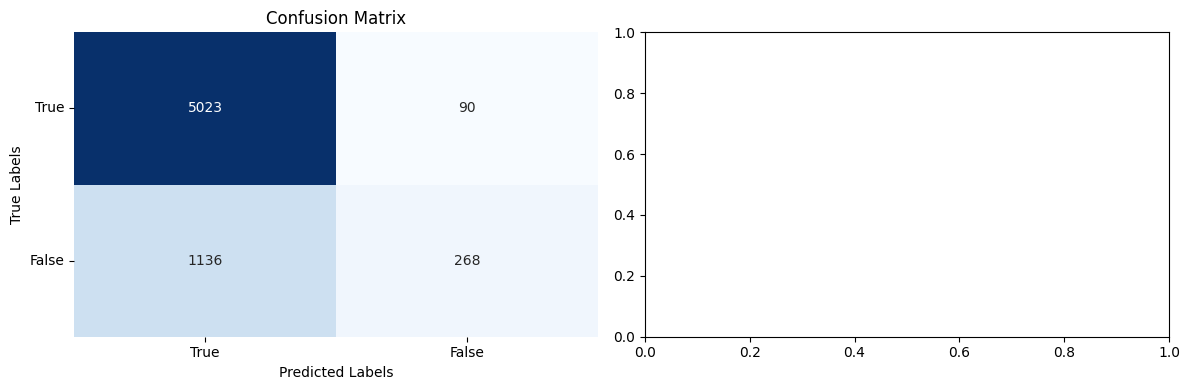

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Define labels for the confusion matrix
labels = ['True Positive','True Negative','False Positive','False Negative']

# Calculate the confusion matrix for Logistic Regression
confusion_matrix = confusion_matrix(test_y, model_logist.predict(test_X))


# Create subplots for the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the confusion matrix 
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')
axes[0].set_xticklabels(['True', 'False'])
axes[0].set_yticklabels(['True', 'False'], rotation=0)

plt.tight_layout()
plt.show()

# Confusion Matrix for Random Forrest

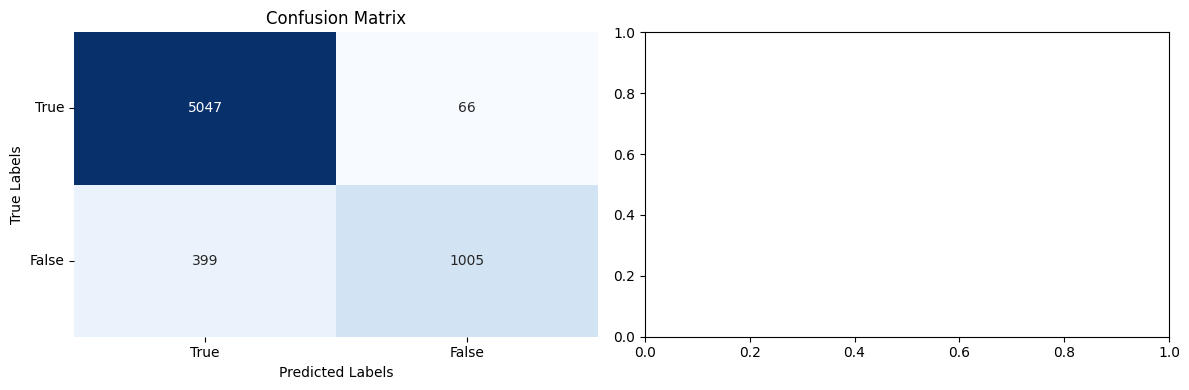

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Define labels for the confusion matrix
labels = ['True Positive','True Negative','False Positive','False Negative']

# Calculate the confusion matrix for Logistic Regression
confusion_matrix = confusion_matrix(test_y, model_rf.predict(test_X))


# Create subplots for the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the confusion matrix 
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')
axes[0].set_xticklabels(['True', 'False'])
axes[0].set_yticklabels(['True', 'False'], rotation=0)

plt.tight_layout()
plt.show()

# Confusion Matrix for Decision Tree

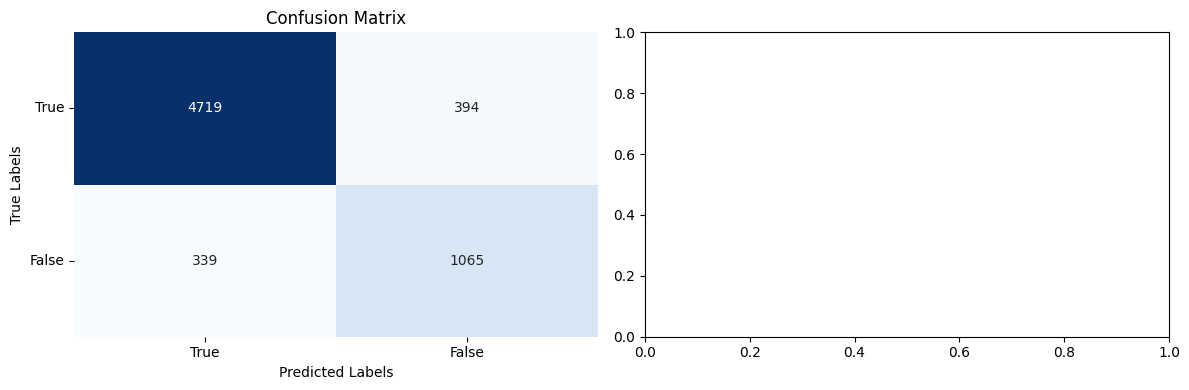

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Define labels for the confusion matrix
labels = ['True Positive','True Negative','False Positive','False Negative']

# Calculate the confusion matrix for Logistic Regression
confusion_matrix = confusion_matrix(test_y, model_dt.predict(test_X))


# Create subplots for the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the confusion matrix 
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')
axes[0].set_xticklabels(['True', 'False'])
axes[0].set_yticklabels(['True', 'False'], rotation=0)

plt.tight_layout()
plt.show()

# Confusion Matrix for Support Vector Classifier

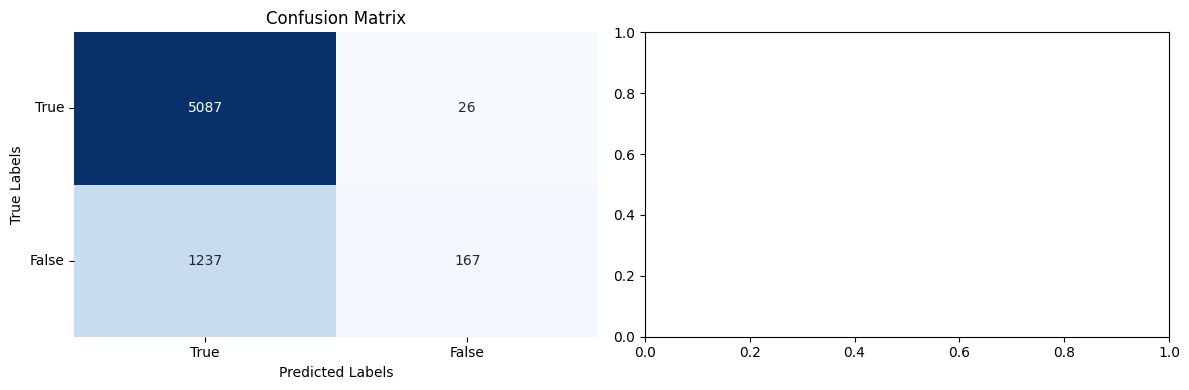

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Define labels for the confusion matrix
labels = ['True Positive','True Negative','False Positive','False Negative']


confusion_matrix = confusion_matrix(test_y, model_svc.predict(test_X))


# Create subplots for the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the confusion matrix 
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')
axes[0].set_xticklabels(['True', 'False'])
axes[0].set_yticklabels(['True', 'False'], rotation=0)

plt.tight_layout()
plt.show()

# Confusion Matrix for Neural Networks

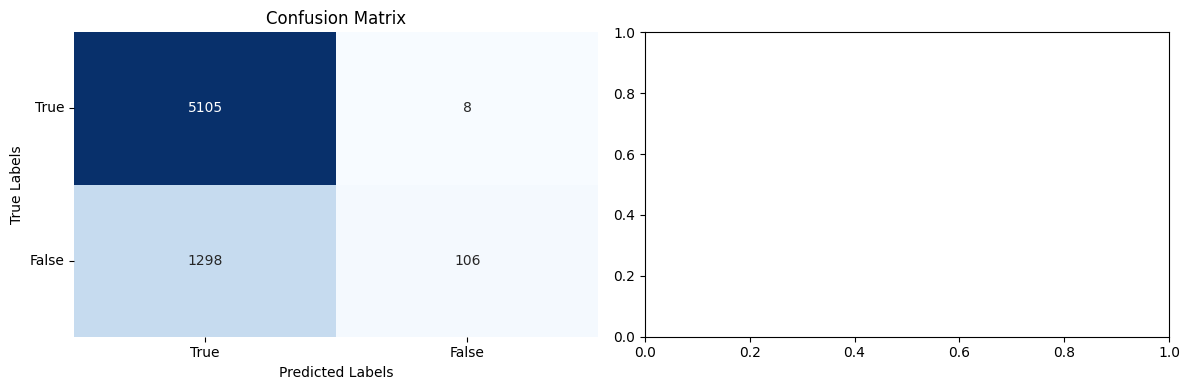

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Define labels for the confusion matrix
labels = ['True Positive','True Negative','False Positive','False Negative']

# Calculate the confusion matrix for Logistic Regression
confusion_matrix = confusion_matrix(test_y, model_nn.predict(test_X))


# Create subplots for the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the confusion matrix 
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')
axes[0].set_xticklabels(['True', 'False'])
axes[0].set_yticklabels(['True', 'False'], rotation=0)

plt.tight_layout()
plt.show()

* Looking at the True Positives for above ML algos, clear winners are Random Forrest, SVC & Decision Trees. But TP is not the only metric which can be used to evaluate ML algos.
* In the context of binary classification models, a model with more True Positives (TP) and fewer False Positives (FP) is generally considered better than a model with more TP and more FP.
* Looking at the confusion matrix's Random Forrest is the clear winner as it has TP - 5000 but also fewer numer of FP, which according to our problem statement is a very good choice.
* A model must have high  precision as it needs to have high chances of correctness.

# Further insights from my analysis are listed below -
    * Factors Decreasing Loan Default Risk:
        1.  Higher annual income
        2.  Longer employment history
        3.  Better loan grade
        4.  Longer credit history
    *  Factors Increasing Loan Default Risk:
        1. Higher loan interest rate
        2. Higher loan payment-to-income ratio
    *  Factors with Less Clear Impact on Default Risk:
        1. Age of the borrower
        2. Loan amount  
    *  Additional Factors Affecting Default Risk:
        1. Homeownership or having a mortgage reduces risk
        2. Different loan types may entail varying risk levels
        3. A history of prior defaults on financial obligations increases the risk of loan default